In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

In [31]:
X, y = make_blobs(n_samples=1000 , centers= 3 , n_features=2 , random_state= 21)

In [32]:
X.shape   # x = iv , y =dv , we will take only x for clustering 

(1000, 2)

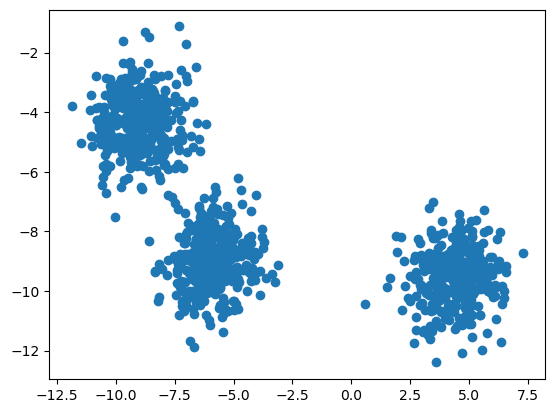

In [33]:
plt.scatter(X[ : ,0] , X[ : ,1] ) 

In [34]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test  = train_test_split( X, y , random_state=42 , test_size= 0.2)

In [36]:
from sklearn.cluster import KMeans

In [37]:
# 1) manual preoceess = Elbow method to select the K value

In [38]:
wcss = [ ] 

for K in range(1,11) : 
    kmeans=KMeans(n_clusters=K , init="k-means++") 
    kmeans.fit(X_train) 
    
    wcss.append(kmeans.inertia_)     # wcss val comes in inertia 

c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [39]:
wcss

[32541.41556989381,
 5878.953964497426,
 1594.2940690749006,
 1389.2182852724256,
 1193.193944704845,
 1007.2610203191261,
 885.9080038681112,
 784.4336161170127,
 694.3941885806029,
 642.162219973761]

In [40]:
# now we will make elbow curve to check K 

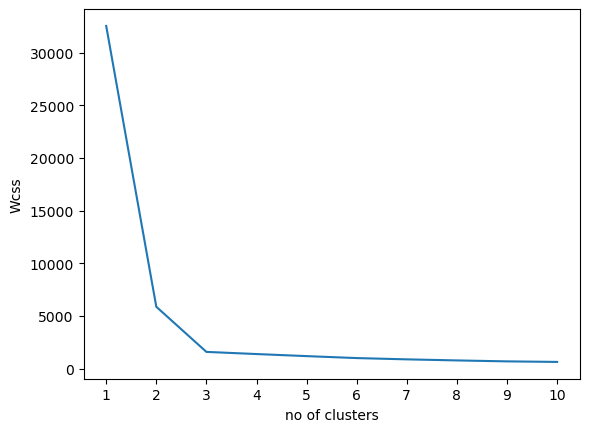

In [41]:
# Elbow curve 

plt.plot(range(1,11) , wcss) 
plt.xticks(range(1,11)) 

plt.xlabel("no of clusters")
plt.ylabel("Wcss") 

plt.show()

In [ ]:
# no we get number of cluster val = 3 , we will use it 

In [42]:
kmeans =KMeans(init="k-means++"  , n_clusters=3) 

In [43]:
y_labels =kmeans.fit_predict(X_train)     # here we have to find the " label " of our X_trian data we called it as y_label 

c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


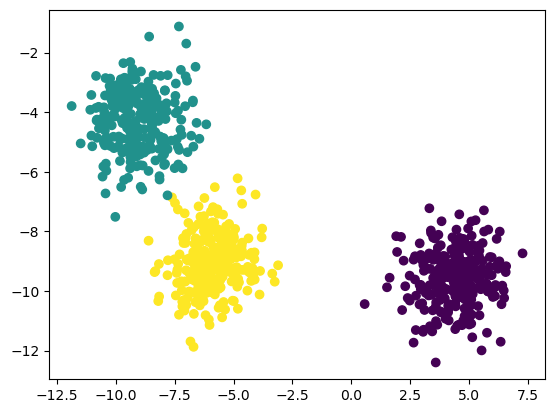

In [44]:
plt.scatter(X_train[ : ,0] , X_train[ : ,1] , c=y_labels) # it categories very well means our k=3 is accurate 

## automatic teche to find cluster  by using  Knee Locater 

In [45]:
!pip install Kneed 

In [47]:
from kneed import KneeLocator

In [48]:
KL =KneeLocator(range(1,11) , wcss , curve="convex" , direction="decreasing") 

KL.elbow  # see 

3

### for perform metrics 

In [49]:
from sklearn.metrics import silhouette_score    # we will check for every K val 

In [50]:
silhouette_coefficents = [ ] 

for k in range(2,11):
   
    kmeans=KMeans(n_clusters=K , init="k-means++") 
    kmeans.fit(X_train) 
    
    score =silhouette_score(X_train , kmeans.labels_)
    
    silhouette_coefficents.append(score)
    

c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [51]:
silhouette_coefficents

[0.343372253149611,
 0.3408595442512983,
 0.3404948007319386,
 0.34170203630681584,
 0.35126460898216677,
 0.34523186784677234,
 0.3398412648457484,
 0.3507234913692763,
 0.34952176985055233]

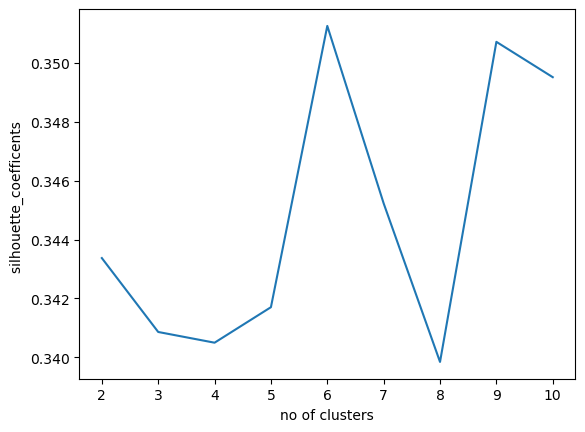

In [52]:
# Elbow curve 

plt.plot(range(2,11) , silhouette_coefficents) 
plt.xticks(range(2,11)) 

plt.xlabel("no of clusters")
plt.ylabel("silhouette_coefficents ") 

plt.show()

# simplified K means 

In [2]:
x , y = make_blobs(n_samples=200 )

In [3]:
x

array([[ 8.61048775e+00,  7.56644510e+00],
       [-5.42728964e-02,  7.86052121e+00],
       [ 9.93174152e+00,  5.41465023e+00],
       [-1.14078138e+00,  8.67916872e+00],
       [ 1.21057198e+00,  8.08779544e+00],
       [ 1.26665264e+00,  7.07315718e+00],
       [ 5.96849773e+00, -4.14664765e+00],
       [ 8.14280248e+00,  5.23914224e+00],
       [ 8.55679713e+00,  7.25013288e+00],
       [ 2.39306478e+00,  7.77840021e+00],
       [ 2.24481071e+00,  4.94376888e+00],
       [ 5.58259202e+00, -4.07953528e+00],
       [ 8.19564336e+00,  4.11022525e+00],
       [-6.25943923e-01,  7.25407612e+00],
       [ 7.76870475e+00,  6.39261558e+00],
       [ 8.33204176e+00,  7.63705178e+00],
       [ 8.56008548e+00,  4.18082132e+00],
       [ 7.98788112e+00,  3.48525210e+00],
       [ 7.54735498e+00,  6.60490294e+00],
       [ 5.08622905e-01,  8.58684477e+00],
       [ 6.06178776e+00,  5.48577198e+00],
       [ 9.64683892e-01,  7.47416084e+00],
       [ 8.89125894e+00,  6.54027671e+00],
       [-1.

In [4]:
y

array([2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2,
       2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2,
       0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0,
       1, 1])

In [5]:
set(y)

{0, 1, 2}

In [7]:
x[0:5]

array([[ 8.61048775,  7.5664451 ],
       [-0.0542729 ,  7.86052121],
       [ 9.93174152,  5.41465023],
       [-1.14078138,  8.67916872],
       [ 1.21057198,  8.08779544]])

In [8]:
import matplotlib.pyplot as plt 

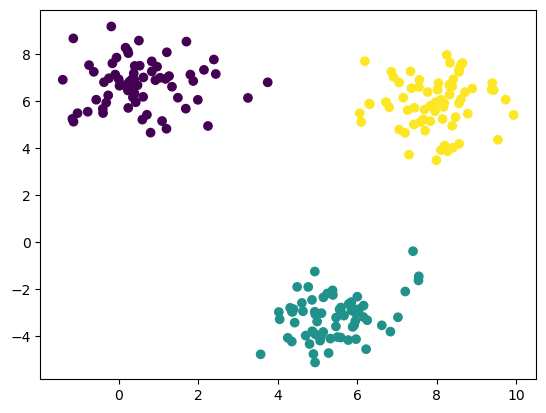

In [11]:
plt.scatter(x[ : ,0] , x[ : ,1] , c =y) 

## assinge the data in cetriod pt 

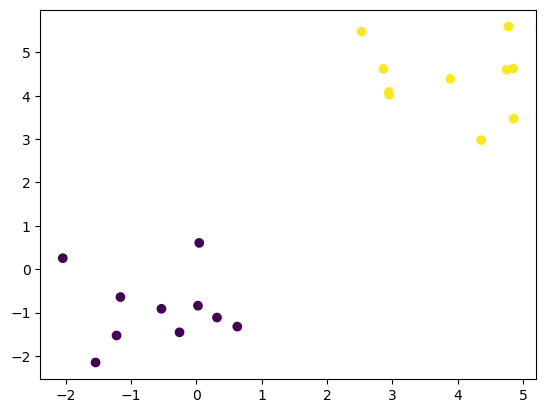

In [13]:
centers = [[-1,-1],[4,4]]
x, y = make_blobs(n_samples=20 , centers=centers ) 

plt.scatter(x[: , 0] , x[: , 1] , c=y)

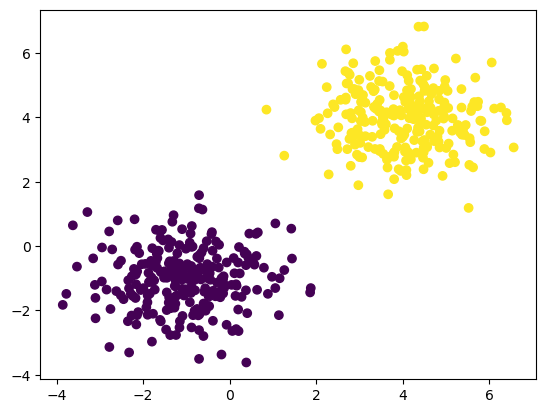

In [14]:
centers = [[-1,-1],[4,4]]
x, y = make_blobs(n_samples=500 , centers=centers ) 

plt.scatter(x[: , 0] , x[: , 1] , c=y)

## new code 

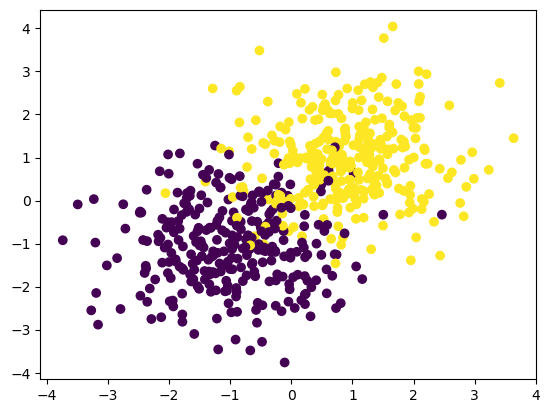

In [27]:
centers = [[-1,-1] ,[1,1]]

x_new , y_new = make_blobs(n_samples=600 , centers=centers )  

plt.scatter(x_new[ : ,0] , x_new[ : ,1] , c=y_new)

# here our data have more noice to clear the data noise by using kmeans 

In [28]:
from sklearn.cluster import KMeans 
kmeans = KMeans(init="k-means++" , n_clusters= 2) 

In [29]:
kmeans.fit(x_new)   # we trian our data 

c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2)

In [30]:
dv_pred_label =kmeans.labels_

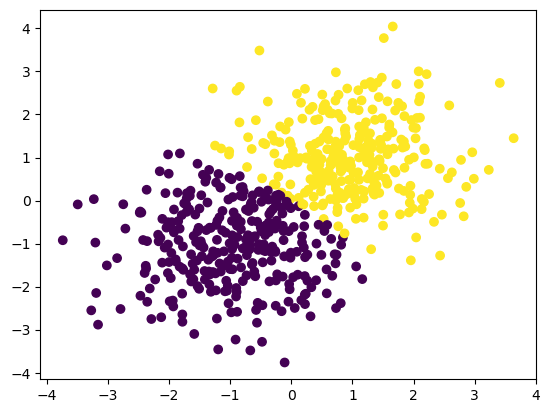

In [31]:
plt.scatter(x_new[ : ,0] , x_new[ : ,1] , c= dv_pred_label)  # here our most of noice is get cleaar and we have 2 cluster which have good boundry

In [32]:
from sklearn.metrics import accuracy_score  

accuracy_score(y_new, dv_pred_label)

0.9233333333333333

In [55]:
centers = [[-1,-1],[2,2],[5,5]]

x_new , y_new = make_blobs(n_samples=800 , centers=centers )  

# plt.scatter(x_new[ : ,0] , x_new[ : ,1] , c=y_new)

In [56]:
x_new  ,  set(y_new)

(array([[ 5.21186041,  4.18005483],
        [-1.10113333, -0.50770382],
        [ 5.6467991 ,  3.4106873 ],
        ...,
        [ 0.49043179, -1.95395954],
        [-1.07574092, -2.69653907],
        [-1.77314901, -0.97236466]]),
 {0, 1, 2})

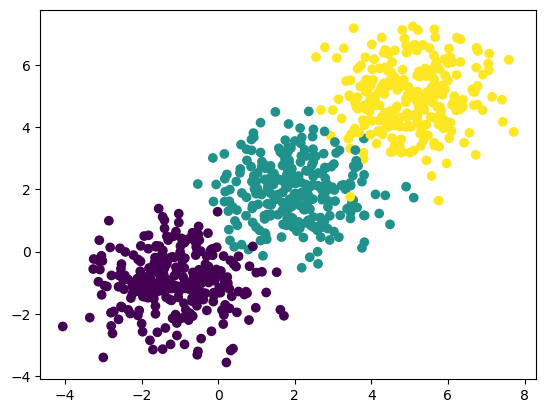

In [57]:
plt.scatter(x_new[ : ,0] , x_new[ : ,1] , c=y_new)

In [63]:
from sklearn.cluster import KMeans 

kmeansAL = KMeans( init= "k-means++" , n_clusters=5) 


In [64]:
kmeansAL.fit(x_new)

c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=5)

In [65]:
pred_dv =kmeansAL.labels_

In [66]:
accuracy_score( pred_dv , y_new )

0.4

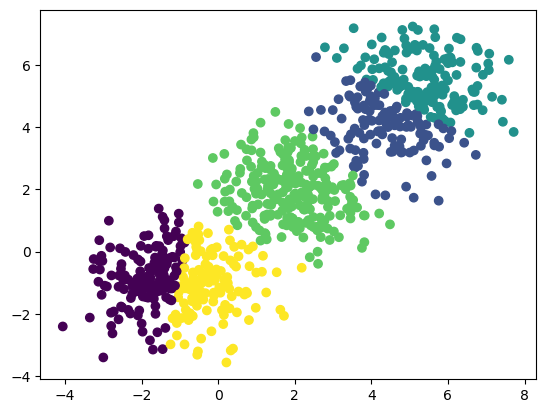

In [67]:
plt.scatter(x_new[ : ,0] , x_new[ : ,1] , c=pred_dv)

In [93]:
centers = [[-1,-1],[2,2],[5,5],[-4,-4]]

x_new1, y_new1 = make_blobs(n_samples=800 , centers=centers )  

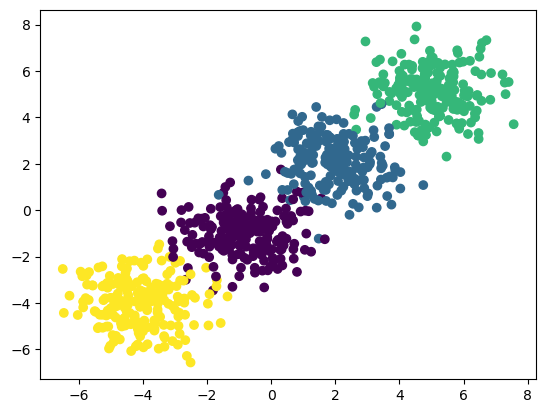

In [94]:
plt.scatter(x_new1[ : ,0] , x_new1[ : ,1] , c=y_new1 )

In [95]:
from sklearn.cluster import KMeans 

kmeansALL = KMeans( init= "k-means++" , n_clusters=4) 


In [96]:

kmeansALL.fit(x_new1)

c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Jayraj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4)

In [97]:
cluster_dv =kmeansALL.labels_

In [98]:
accuracy_score(cluster_dv , y_new1)

0.4925

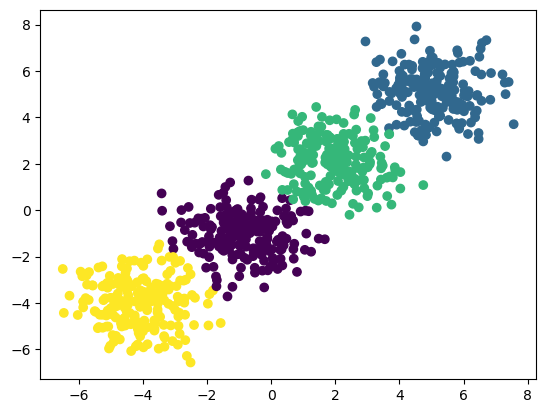

In [99]:
plt.scatter(x_new1[ : ,0] , x_new1[ : ,1] , c=cluster_dv)